In [1]:
CLIENT_ID = '7a2ee58995f7488e8d14120fea5402fe'
CLIENT_SECRET = 'ab97da5b2df24042afd5398b8b1c29b5'

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2022', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])

In [4]:
len(artist_id)

1000

In [5]:
import pandas as pd
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
track_df.head()

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Drake,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,96,3TVXtAsR1Inumwj472S9r4
1,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,97,06HL4z0CvFAxyc27GXpf02
2,Sam Smith,Unholy (feat. Kim Petras),3nqQXoyQOWXiESFLlDF1hG,100,2wY79sveU1sp5g7SokKOiI
3,d4vd,Romantic Homicide,1xK59OXxi2TAAAbmZK0kBL,94,5y8tKLUfMvliMe8IKamR32
4,Lil Uzi Vert,Just Wanna Rock,4FyesJzVpA39hbYvcseO2d,90,4O15NlyKLIASxsJ0PrXPfz


In [8]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
    artist = sp.artist(a_id)
    artist_popularity.append(artist['popularity'])
    artist_genres.append(artist['genres'])
    artist_followers.append(artist['followers']['total'])

In [9]:
track_df = track_df.assign(artist_popularity=artist_popularity, artist_genres=artist_genres, artist_followers=artist_followers)
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Drake,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,96,3TVXtAsR1Inumwj472S9r4,97,"[canadian hip hop, canadian pop, hip hop, rap,...",69703325
1,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,97,06HL4z0CvFAxyc27GXpf02,100,[pop],63840838
2,Sam Smith,Unholy (feat. Kim Petras),3nqQXoyQOWXiESFLlDF1hG,100,2wY79sveU1sp5g7SokKOiI,88,"[dance pop, pop, uk pop]",20996143
3,d4vd,Romantic Homicide,1xK59OXxi2TAAAbmZK0kBL,94,5y8tKLUfMvliMe8IKamR32,80,[bedroom pop],400958
4,Lil Uzi Vert,Just Wanna Rock,4FyesJzVpA39hbYvcseO2d,90,4O15NlyKLIASxsJ0PrXPfz,86,"[melodic rap, philly rap, rap, trap]",14161955


In [78]:
len(track_df['track_id'])

1000

In [79]:
track_features = []
for t_id in track_df['track_id']:
  af = sp.audio_features(t_id)
  track_features.append(af)
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
len(tf_df)
for item in track_features:
  for feat in item:
    tf_df = tf_df.append(feat, ignore_index=True)
tf_df.head()

KeyboardInterrupt: 

In [80]:
len(tf_df)

998

In [52]:
playlist_df=tf_df[["id", "acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]
playlist_df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,1bDbXMyjaUIooNwFE9wn0N,0.0503,0.561,239360,0.52,0.000002,11,0.355,-9.342,0,0.244,153.15,0.424
1,0V3wPSX9ygBnCm8psDIegu,0.13,0.637,200690,0.643,0.000002,4,0.142,-6.571,1,0.0519,97.008,0.533
2,3nqQXoyQOWXiESFLlDF1hG,0.013,0.714,156943,0.472,0.000005,2,0.266,-7.375,1,0.0864,131.121,0.238
3,1xK59OXxi2TAAAbmZK0kBL,0.453,0.571,132631,0.544,0.00805,6,0.322,-10.613,1,0.0299,132.052,0.216
4,4FyesJzVpA39hbYvcseO2d,0.0652,0.486,123891,0.545,0.00474,11,0.0642,-7.924,1,0.0336,150.187,0.0385


In [81]:
len(playlist_df)

998

In [82]:
len(tf_df['track_popularity'])

998

In [55]:
track_names = track_df['track_name'].tolist()

In [56]:
track_names

['Rich Flex',
 'Anti-Hero',
 'Unholy (feat. Kim Petras)',
 'Romantic Homicide',
 'Just Wanna Rock',
 'Something in the Orange',
 'Jimmy Cooks (feat. 21 Savage)',
 'Bad Habit',
 'Tití Me Preguntó',
 'Me Porto Bonito',
 'You Proof',
 'Pussy & Millions (feat. Travis Scott)',
 'Major Distribution',
 'Shirt',
 'On BS',
 "I'm Good (Blue)",
 'Lavender Haze',
 "I Ain't Worried",
 'WAIT FOR U (feat. Drake & Tems)',
 'Midnight Rain',
 'Kill Bill',
 'Bad Habit',
 'Made You Look',
 'golden hour',
 'Spin Bout U',
 'I Like You (A Happier Song) (with Doja Cat)',
 'As It Was',
 'Die For You',
 "Creepin' (with The Weeknd & 21 Savage)",
 'Here With Me',
 'CUFF IT',
 'Circo Loco',
 'Efecto',
 'Rock and A Hard Place',
 'Late Night Talking',
 'Privileged Rappers',
 'Maroon',
 'Nobody Gets Me',
 'Evergreen (You Didn’t Deserve Me At All)',
 'Broke Boys',
 'Anti-Hero',
 'La Bachata',
 'Snow On The Beach (feat. Lana Del Rey)',
 'Karma',
 'Superhero (Heroes & Villains) [with Future & Chris Brown]',
 'Blind',
 '

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

v=TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 6), max_features=10000)
X_names_sparse = v.fit_transform(track_names[:998])
X_names_sparse.shape

(998, 4362)

In [58]:
popularity_list = tf_df['track_popularity'].tolist()

In [59]:
import sklearn

In [35]:
!pip install -U scikit-learn==0.23.2

  Using cached scikit-learn-0.23.2.tar.gz (7.2 MB)
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /Users/alban/opt/anaconda3/bin/python /private/var/folders/1g/dn_fdr795vdgq1fc7vkqm3j00000gn/T/pip-standalone-pip-z9pkurtc/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/1g/dn_fdr795vdgq1fc7vkqm3j00000gn/T/pip-build-env-39j5d9ad/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'Cython>=0.28.5' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation == '"'"'CPython'"'"'' 'numpy==1.14.0; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation != '"'"'CPython'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"''

    C compiler: clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /Users/alban/opt/anaconda3/include -arch arm64 -I/Users/alban/opt/anaconda3/include -fPIC -O2 -isystem /Users/alban/opt/anaconda3/include -arch arm64
  
    compile options: '-Inumpy/core/src/common -Inumpy/core/src -Inumpy/core -Inumpy/core/src/npymath -Inumpy/core/src/multiarray -Inumpy/core/src/umath -Inumpy/core/src/npysort -I/Users/alban/opt/anaconda3/include/python3.9 -c'
    clang: _configtest.c
    _configtest.c:7:20: error: use of unknown builtin '__builtin_cpu_supports' [-Wimplicit-function-declaration]
      volatile int r = __builtin_cpu_supports("avx512f");
                       ^
    _configtest.c:7:16: warning: unused variable 'r' [-Wunused-variable]
      volatile int r = __builtin_cpu_supports("avx512f");
                   ^
    1 warning and 1 error generated.
    failure.
    removing: _configtest.c _configtest.o
    C compiler: clang -Wno-unused

In [38]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [44]:
len(playlist_df)

998

In [43]:
X_train.shape

(998, 12)

In [61]:
len(y_train)

998

In [67]:
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.0503,0.561,239360,0.52,0.000002,11,0.355,-9.342,0,0.244,153.15,0.424
1,0.13,0.637,200690,0.643,0.000002,4,0.142,-6.571,1,0.0519,97.008,0.533
2,0.013,0.714,156943,0.472,0.000005,2,0.266,-7.375,1,0.0864,131.121,0.238
3,0.453,0.571,132631,0.544,0.00805,6,0.322,-10.613,1,0.0299,132.052,0.216
4,0.0652,0.486,123891,0.545,0.00474,11,0.0642,-7.924,1,0.0336,150.187,0.0385
...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.816,0.464,139806,0.126,0.000004,11,0.559,-16.383,1,0.0647,103.176,0.181
994,0.947,0.766,188107,0.295,0.000044,0,0.119,-7.893,0,0.0464,136.016,0.805
995,0.498,0.54,290132,0.11,0.000614,8,0.0781,-19.885,1,0.0328,76.068,0.172
996,0.000582,0.728,212166,0.741,0.00206,6,0.33,-7.075,0,0.0473,123.006,0.31


In [69]:
for el in X_train:
    if el== None:
        print(el)

In [88]:
track_df['track_popularity'][:998].shape

(998,)

In [90]:
import numpy as np

In [91]:
# Analyze feature importances
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

X_train = playlist_df.drop(['id'], axis=1)
y_train = track_df['track_popularity'][:998]
forest = RandomForestClassifier(random_state=42, max_depth=5, max_features=12) # Set by GridSearchCV below
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
  
for f in range(len(importances)):
    print("%d. %s %f " % (f + 1, 
            X_train.columns[f], 
            importances[indices[f]]))

Feature ranking:
1. acousticness 0.183228 
2. danceability 0.105332 
3. duration_ms 0.102978 
4. energy 0.102049 
5. instrumentalness 0.084015 
6. key 0.080720 
7. liveness 0.077987 
8. loudness 0.073713 
9. mode 0.066658 
10. speechiness 0.058317 
11. tempo 0.036304 
12. valence 0.028699 


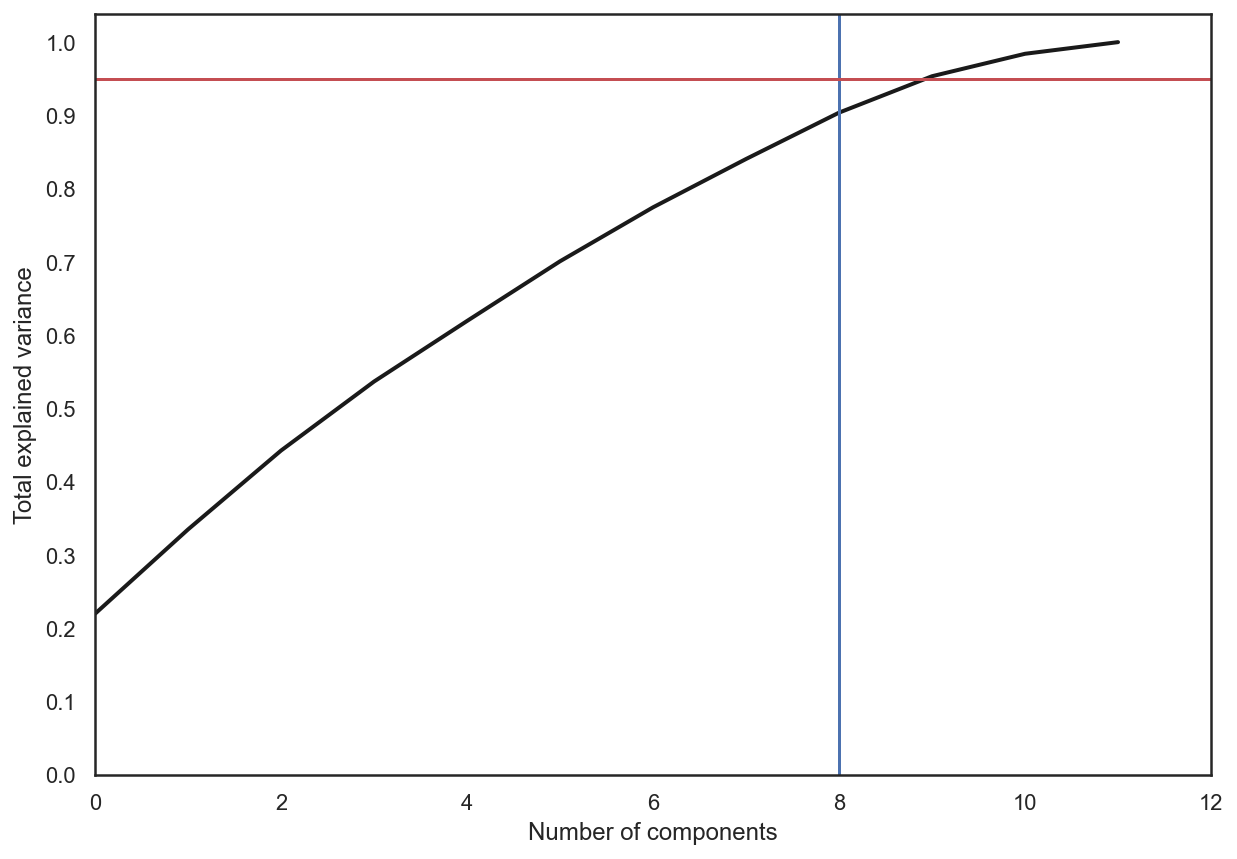

In [97]:
# Apply pca to the scaled train set first

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

X_scaled = StandardScaler().fit_transform(X_train)

pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 12)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(8, c='b') # Tune this so that you obtain at least a 95% total variance explained
plt.axhline(0.95, c='r')
plt.show();

In [98]:
# Fit your dataset to the optimal pca
pca1 = decomposition.PCA(n_components=8)
X_pca = pca1.fit_transform(X_scaled)

In [99]:
# You may want to check the results of TSNE also
from sklearn.manifold import TSNE

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(X_scaled)

/Users/alban/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/alban/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [154]:
from scipy.sparse import csr_matrix, hstack

X_train_last = csr_matrix(hstack([X_pca, X_names_sparse])).toarray() # Check with X_tsne + X_names_sparse also

In [156]:
X_train_last

array([[ 0.32700449,  0.89865994,  0.89169351, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13302989, -0.02012584, -0.63736949, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.36106291, -0.03040861, -0.02220663, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 5.52550552, -0.26893309,  0.28416527, ...,  0.        ,
         0.        ,  0.        ],
       [-0.85075043,  1.31535501,  0.80477832, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.4785052 ,  1.44805655, -1.01967551, ...,  0.        ,
         0.        ,  0.        ]])

In [101]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Initialize a stratified split for the validation process
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [102]:
# Decision Trees First
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params, cv=skf, n_jobs=-1, verbose=True)

tree_grid.fit(X_train_last, y_train)
tree_grid.best_estimator_, tree_grid.best_score_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


(DecisionTreeClassifier(max_depth=7, max_features=12), 0.08419095477386936)

In [103]:
# Random Forests second

parameters = {'max_features': [4, 7, 8, 10], 'min_samples_leaf': [1, 3, 5, 8], 'max_depth': [3, 5, 8]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv1 = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv1.fit(X_train_last, y_train)
gcv1.best_estimator_, gcv1.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


(RandomForestClassifier(max_depth=8, max_features=10, n_jobs=-1, oob_score=True,
                        random_state=42),
 0.07515075376884421)

In [104]:
# kNN third
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors': range(1, 10)}
knn = KNeighborsClassifier(n_jobs=-1)

knn_grid = GridSearchCV(knn, knn_params, cv=skf, n_jobs=-1, verbose=True)
knn_grid.fit(X_train_last, y_train)
knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


({'n_neighbors': 4}, 0.07515577889447236)

In [115]:
len(playlist_df['id'].values.tolist())

998

In [139]:
# Now build your test set;
# Generate a new dataframe for recommended tracks
# Set recommendation limit as half the Playlist Length per track, you may change this as you like
# Check documentation for  recommendations; https://beta.developer.spotify.com/documentation/web-api/reference/browse/get-recommendations/

rec_tracks = []
for j,i in enumerate(playlist_df['id'].values.tolist()[:100]):
    print(j)
    rec_tracks += sp.recommendations(seed_tracks=[i], limit=1)['tracks'];

rec_track_ids = []
rec_track_names = []
for i in rec_tracks:
    rec_track_ids.append(i['id'])
    rec_track_names.append(i['name'])

rec_features = []
for i in range(0,len(rec_track_ids)):
    rec_audio_features = sp.audio_features(rec_track_ids[i])
    for track in rec_audio_features:
        rec_features.append(track)
        
rec_playlist_df = pd.DataFrame(rec_features, index = rec_track_ids)
rec_playlist_df.head()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
2yjlYDiNiQkdxVqTlaSrlX,0.951,0.878,2,-2.565,1,0.2110,0.05090,0.000016,0.321,0.923,133.014,audio_features,2yjlYDiNiQkdxVqTlaSrlX,spotify:track:2yjlYDiNiQkdxVqTlaSrlX,https://api.spotify.com/v1/tracks/2yjlYDiNiQkd...,https://api.spotify.com/v1/audio-analysis/2yjl...,170977,4
2JN3ugW1cEahbYw0I5mw5U,0.474,0.343,4,-8.571,0,0.0270,0.57800,0.000027,0.305,0.152,145.115,audio_features,2JN3ugW1cEahbYw0I5mw5U,spotify:track:2JN3ugW1cEahbYw0I5mw5U,https://api.spotify.com/v1/tracks/2JN3ugW1cEah...,https://api.spotify.com/v1/audio-analysis/2JN3...,243907,3
2qfFLxiCWqQarHQ9cVoXKy,0.600,0.483,1,-5.358,0,0.0276,0.03770,0.000000,0.112,0.192,92.001,audio_features,2qfFLxiCWqQarHQ9cVoXKy,spotify:track:2qfFLxiCWqQarHQ9cVoXKy,https://api.spotify.com/v1/tracks/2qfFLxiCWqQa...,https://api.spotify.com/v1/audio-analysis/2qfF...,152842,4
4DYKah8mcZf0O4l9Gt7woU,0.356,0.401,10,-10.303,1,0.0278,0.42600,0.000015,0.131,0.380,92.488,audio_features,4DYKah8mcZf0O4l9Gt7woU,spotify:track:4DYKah8mcZf0O4l9Gt7woU,https://api.spotify.com/v1/tracks/4DYKah8mcZf0...,https://api.spotify.com/v1/audio-analysis/4DYK...,177400,4
7GX5flRQZVHRAGd6B4TmDO,0.732,0.750,11,-6.366,0,0.2310,0.00264,0.000000,0.109,0.401,155.096,audio_features,7GX5flRQZVHRAGd6B4TmDO,spotify:track:7GX5flRQZVHRAGd6B4TmDO,https://api.spotify.com/v1/tracks/7GX5flRQZVHR...,https://api.spotify.com/v1/audio-analysis/7GX5...,182707,4


In [144]:
len(rec_track_names)

100

In [145]:
X_test_names = v.transform(rec_track_names)


In [140]:
y_train

0       96
1       97
2      100
3       94
4       90
      ... 
993     71
994     69
995     72
996     80
997     71
Name: track_popularity, Length: 998, dtype: int64

In [146]:
rec_playlist_df=rec_playlist_df[["acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]

In [151]:
X_train_last

<998x4370 sparse matrix of type '<class 'numpy.float64'>'
	with 15844 stored elements in Compressed Sparse Row format>

In [173]:
# Make predictions
tree_grid.best_estimator_.fit(X_train_last, y_train)
rec_playlist_df_scaled = StandardScaler().fit_transform(rec_playlist_df)
rec_playlist_df_pca = pca1.transform(rec_playlist_df_scaled)
X_test_last = csr_matrix(hstack([rec_playlist_df_pca, X_test_names]))
y_pred_class = tree_grid.best_estimator_.predict(X_test_last)

In [174]:
y_pred_class

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 80,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 92,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [175]:
rec_playlist_df['ratings']=y_pred_class
rec_playlist_df = rec_playlist_df.sort_values('ratings', ascending = False)
rec_playlist_df = rec_playlist_df.reset_index()

# Pick the top ranking tracks to add your new playlist 9, 10 will work
recs_to_add = rec_playlist_df[rec_playlist_df['ratings']>=80]['index'].values.tolist()

In [176]:
y_pred_class

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 80,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 92,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [184]:
rec_playlist_df

,index,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,ratings
0,6Xom58OOXk2SoU711L2IXO,0.29400,0.804,245940,0.674,0.000001,5,0.1150,-5.453,0,0.0333,99.968,0.292,92
1,0YKava2nZj0xgl5gHHM8oS,0.48400,0.470,191093,0.479,0.000000,2,0.0924,-8.124,1,0.0349,74.889,0.476,80
2,2yjlYDiNiQkdxVqTlaSrlX,0.05090,0.951,170977,0.878,0.000016,2,0.3210,-2.565,1,0.2110,133.014,0.923,0
3,05ZA9WD25P4ynY41Bd15Km,0.48800,0.362,175389,0.448,0.000000,3,0.1540,-6.120,1,0.0872,76.692,0.166,0
4,0Z51m9YDx0r4Q5ZpSQdIIL,0.01690,0.692,147122,0.686,0.000000,9,0.1110,-5.062,0,0.1100,95.013,0.348,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6sHgMLiwXXCbg2AbkzQAWK,0.18900,0.753,175092,0.771,0.000109,0,0.0712,-6.440,1,0.0475,83.041,0.718,0
96,5IonbH68pmDKBwcKlyswmR,0.35000,0.429,258013,0.457,0.859000,3,0.0990,-8.375,1,0.0294,124.033,0.183,0
97,2OTRqsDes7OYRRwbF2JXsa,0.40600,0.576,182440,0.360,0.000103,7,0.1610,-9.321,1,0.0352,126.836,0.166,0
98,0X0V9wIUr47ZqbFqLfZqX5,0.00342,0.416,155317,0.813,0.416000,11,0.4820,-9.742,0,0.0351,175.007,0.842,0


In [177]:
# No ratings of 9 or 10 this case try adding 8's only
recs_to_add = rec_playlist_df[rec_playlist_df['ratings']>=80]['index'].values.tolist()

In [178]:
# Check what is about to happen :)
len(rec_tracks), rec_playlist_df.shape, len(recs_to_add)

(100, (100, 14), 2)

In [181]:
recs_to_add

['6Xom58OOXk2SoU711L2IXO', '0YKava2nZj0xgl5gHHM8oS']

In [183]:
sp.search(q='id:'+recs_to_add[0])

ReadTimeout: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)

In [180]:
rec_array = np.reshape(recs_to_add, (2, 53))

ValueError: cannot reshape array of size 2 into shape (2,53)

In [29]:
cols_to_drop2 = ['key','mode','type', 'uri','track_href','analysis_url']
tf_df = tf_df.drop(columns=cols_to_drop2)
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   danceability      999 non-null    object
 1   energy            999 non-null    object
 2   loudness          999 non-null    object
 3   speechiness       999 non-nul

In [30]:
track_df['artist_name'] = track_df['artist_name'].astype("string")
track_df['track_name'] = track_df['track_name'].astype("string")
track_df['track_id'] = track_df['track_id'].astype("string")
track_df['artist_id'] = track_df['artist_id'].astype("string")
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   string
 1   track_name         1000 non-null   string
 2   track_id           1000 non-null   string
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   string
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      999 non-null    object  
 1   energy            999 non-null    object  
 2   loudness          999 non-null    object  
 3   speechin

In [31]:
track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)


,track_name,artist_name
0,Unholy (feat. Kim Petras),Sam Smith
72,La Bachata,Manuel Turizo
88,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap
22,I'm Good (Blue),David Guetta
1,Anti-Hero,Taylor Swift
8,Tití Me Preguntó,Bad Bunny
11,Me Porto Bonito,Bad Bunny
20,I Ain't Worried,OneRepublic
49,Efecto,Bad Bunny
50,CUFF IT,Beyoncé


In [32]:
by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_popularity', 'artist_name','artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(20)

,artist_followers,artist_popularity,artist_name,artist_genres
657,104848718,89,Ed Sheeran,"['pop', 'uk pop']"
988,71598447,87,Billie Eilish,"['art pop', 'electropop', 'pop']"
162,68670658,97,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
730,67321678,89,Justin Bieber,"['canadian pop', 'pop']"
119,61938852,100,Taylor Swift,['pop']
49,58836637,97,Bad Bunny,"['reggaeton', 'trap latino']"
405,57153603,90,BTS,"['k-pop', 'k-pop boy group']"
974,52318368,93,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."
400,50912486,88,Rihanna,"['barbadian pop', 'dance pop', 'pop', 'urban c..."
138,43222738,87,Imagine Dragons,"['modern rock', 'rock']"


In [33]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
to_1D(track_df['artist_genres']).value_counts().head(20)

pop                      396
rap                      188
dance pop                118
hip hop                  107
trap                      93
canadian pop              82
trap latino               64
contemporary country      63
edm                       59
pop dance                 58
country                   52
uk pop                    47
big room                  47
reggaeton                 44
melodic rap               44
atl hip hop               43
nueva musica mexicana     40
canadian hip hop          37
r&b                       36
toronto rap               36
dtype: int64

Text(0.5, 1.0, 'Top genres')

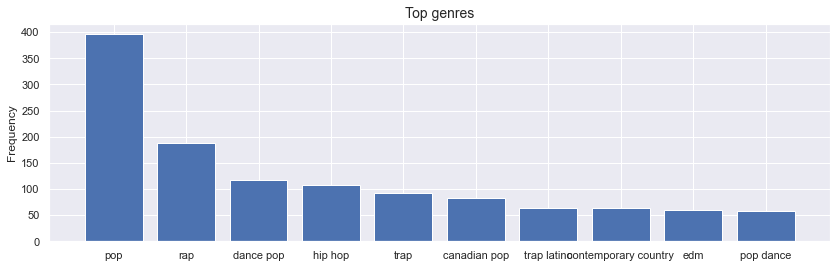

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:10],
        to_1D(track_df['artist_genres']).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14)

In [35]:
top_10_genres = list(to_1D(track_df['artist_genres']).value_counts().index[:20])
top_artists_by_genre = []
for genre in top_10_genres:
  for index, row in by_art_fol.iterrows():
    if genre in row['artist_genres']:
      top_artists_by_genre.append({'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_artists_by_genre)

,artist_name,artist_genre
0,Ed Sheeran,pop
1,Drake,rap
2,Rihanna,dance pop
3,Drake,hip hop
4,Lil Uzi Vert,trap
5,Drake,canadian pop
6,Bad Bunny,trap latino
7,Luke Bryan,contemporary country
8,Marshmello,edm
9,Marshmello,pop dance


In [36]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['track_popularity'], ascending=False)[['track_popularity','track_name', 'artist_name','artist_genres', 'track_id']])
by_track_pop.astype(str).drop_duplicates().head(20)
top_songs_by_genre = []
for genre in top_10_genres:
  for index, row in by_track_pop.iterrows():
    if genre in row['artist_genres']:
      top_songs_by_genre.append({'track_name':row['track_name'], 'track_popularity':row['track_popularity'],'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_songs_by_genre)

,track_name,track_popularity,artist_name,artist_genre
0,Unholy (feat. Kim Petras),100,Sam Smith,pop
1,Rich Flex,92,Drake,rap
2,Unholy (feat. Kim Petras),100,Sam Smith,dance pop
3,Rich Flex,92,Drake,hip hop
4,WAIT FOR U (feat. Drake & Tems),88,Future,trap
5,Rich Flex,92,Drake,canadian pop
6,La Bachata,97,Manuel Turizo,trap latino
7,You Proof,84,Morgan Wallen,contemporary country
8,I'm Good (Blue),97,David Guetta,edm
9,I'm Good (Blue),97,David Guetta,pop dance


In [108]:
pd.json_normalize(top_songs_by_genre)["artist_genre"]

0                       pop
1                       rap
2                 dance pop
3                   hip hop
4                      trap
5              canadian pop
6               trap latino
7      contemporary country
8                       edm
9                 pop dance
10                  country
11                   uk pop
12                 big room
13                reggaeton
14              melodic rap
15              atl hip hop
16    nueva musica mexicana
17         canadian hip hop
18                      r&b
19              toronto rap
Name: artist_genre, dtype: object

In [58]:
tf_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.714,0.472,-7.375,0.0864,0.013,0.000005,0.266,0.238,131.121,3nqQXoyQOWXiESFLlDF1hG,156943,4
1,0.637,0.643,-6.571,0.0519,0.13,0.000002,0.142,0.533,97.008,0V3wPSX9ygBnCm8psDIegu,200690,4
2,0.561,0.52,-9.342,0.244,0.0503,0.000002,0.355,0.424,153.15,1bDbXMyjaUIooNwFE9wn0N,239360,3
3,0.571,0.544,-10.613,0.0299,0.453,0.008050,0.322,0.216,132.052,1xK59OXxi2TAAAbmZK0kBL,132631,4
4,0.908,0.546,-10.491,0.323,0.0127,0.000000,0.0707,0.225,131.016,46s57QULU02Voy0Kup6UEb,170502,4
...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.811,0.728,-9.816,0.0702,0.241,0.001730,0.0669,0.576,111.997,1OiSTEB1SEaLGza2k4FIwo,380053,4
995,0.822,0.874,-4.006,0.113,0.0895,0.000004,0.0737,0.369,155.032,5OIz27S6SQOJtweneBd6QP,172053,4
996,0.588,0.496,-5.947,0.0417,0.00166,0.936000,0.186,0.582,128.001,7mLWNwcvwRdEviz6SfYp8A,146274,4
997,0.824,0.697,-4.869,0.0473,0.158,0.000041,0.077,0.757,99.988,7fYRg3CEbk6rNCuzNzMT06,214460,4


In [110]:
track_df

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Sam Smith,Unholy (feat. Kim Petras),3nqQXoyQOWXiESFLlDF1hG,100,2wY79sveU1sp5g7SokKOiI,87,"[dance pop, pop, uk pop]",20698155
1,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,97,06HL4z0CvFAxyc27GXpf02,100,[pop],61938852
2,Drake,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,92,3TVXtAsR1Inumwj472S9r4,97,"[canadian hip hop, canadian pop, hip hop, rap,...",68670658
3,d4vd,Romantic Homicide,1xK59OXxi2TAAAbmZK0kBL,93,5y8tKLUfMvliMe8IKamR32,77,[bedroom pop],268908
4,Drake,Major Distribution,46s57QULU02Voy0Kup6UEb,90,3TVXtAsR1Inumwj472S9r4,97,"[canadian hip hop, canadian pop, hip hop, rap,...",68670658
...,...,...,...,...,...,...,...,...
995,DBN Gogo,Love & Loyalty (Believe),1OiSTEB1SEaLGza2k4FIwo,63,3Oa0mJQWQrUOqJ8fcLuu7l,52,[amapiano],451780
996,Kid Cudi,Do What I Want,5OIz27S6SQOJtweneBd6QP,69,0fA0VVWsXO9YnASrzqfmYu,81,"[hip hop, ohio hip hop, rap]",6129413
997,g3ox_em,GigaChad Theme - Phonk House Version,7mLWNwcvwRdEviz6SfYp8A,78,0Zw2ivPEDptvMHwCXjhdRs,60,[gym hardstyle],4267
998,Calvin Harris,Potion (with Dua Lipa & Young Thug),7fYRg3CEbk6rNCuzNzMT06,77,7CajNmpbOovFoOoasH2HaY,83,"[dance pop, edm, electro house, house, pop, pr...",22951198


In [119]:
len(track_df)

1000

In [186]:
len(top_10_genres)

20

In [165]:
genre_list = []
genre_names = []

activate = 0
i = 0

for elem in track_df['artist_genres']:
    i += 1
    for j, genre in enumerate(top_10_genres):
        activate = 0
        if genre in elem:
            genre_list.append(j)
            break
        else:
            activate = 1
    if(activate):
        genre_list.append(11)
        
    
            

In [259]:
tf_df[x_label][0]

0.714

------------

In [333]:
genre_list = []
genre_names = []

x = []
y = []

x_label = "tempo"
y_label = "danceability"

activate = 0
i = 0

for j, elem in enumerate(track_df['artist_genres'][:999]):
    i += 1
    for genre in top_10_genres:
        activate = 0
        if genre in elem:
            genre_list.append(genre)
            break
        else:
            activate = 1
    if(activate):
        pass
        #genre_list.append("no top genre")
    else:
        x.append(tf_df[x_label][j])
        y.append(tf_df[y_label][j])
        
    
            

In [334]:
my_dict = {i:genre_list.count(i) for i in genre_list}

In [335]:
new_genres = list(my_dict.keys())

In [336]:
new_genre_list = []

for elem in genre_list:
    new_genre_list.append(new_genres.index(elem))

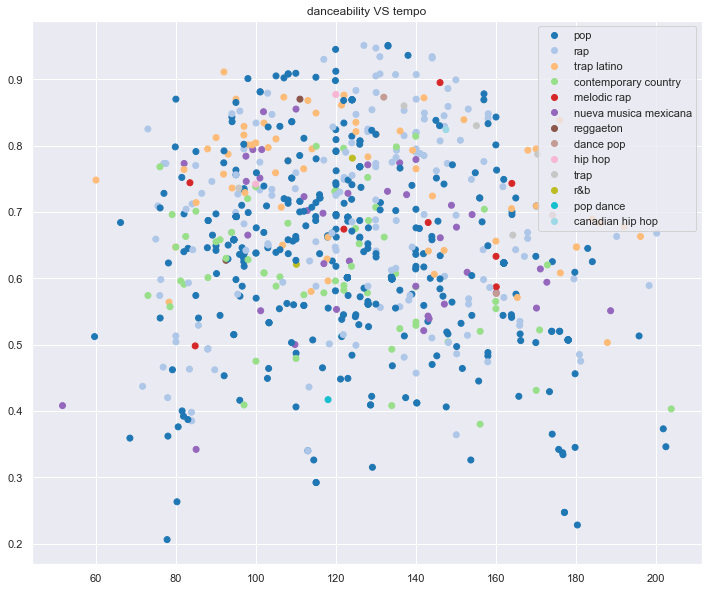

In [337]:
# plot
scatter = plt.scatter(
   x, y,
   c=new_genre_list[:999], cmap='tab20'
)

plt.legend(handles=scatter.legend_elements()[0], labels=new_genres)

plt.title( str(y_label)+" VS "+str(x_label))


plt.show()

---------------

In [338]:
X = np.array(tf_df[[x_label,y_label]].values.tolist())

In [347]:
from sklearn.cluster import KMeans

nbre_clust = 14

km = KMeans(
    n_clusters=nbre_clust, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

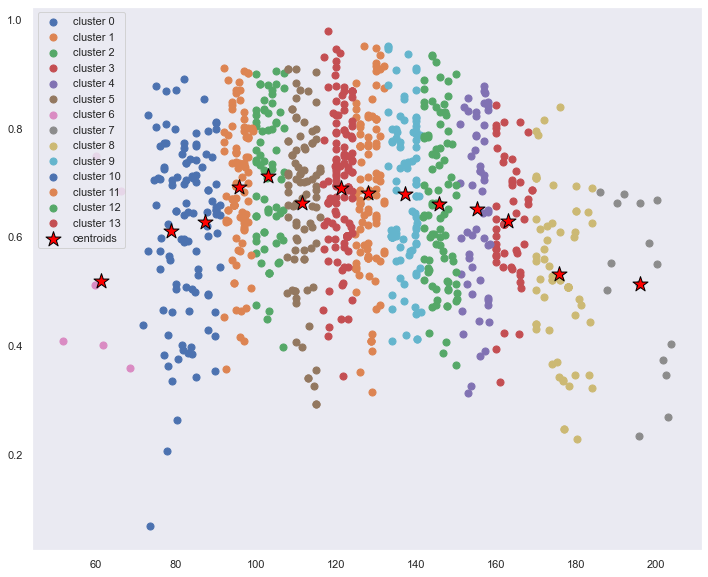

In [348]:
# plot the 3 clusters

for i in range(nbre_clust):
    plt.scatter(
        X[y_km == i, 0], X[y_km == i, 1],
        s=50,
        label='cluster '+ str(i)
    )
    
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

-------------

In [262]:
len(genre_list)

744

In [263]:
genre_list

['pop',
 'pop',
 'rap',
 'rap',
 'rap',
 'trap latino',
 'pop',
 'rap',
 'trap latino',
 'rap',
 'pop',
 'rap',
 'rap',
 'pop',
 'rap',
 'rap',
 'pop',
 'pop',
 'rap',
 'pop',
 'pop',
 'contemporary country',
 'rap',
 'pop',
 'pop',
 'pop',
 'rap',
 'pop',
 'pop',
 'rap',
 'pop',
 'pop',
 'pop',
 'pop',
 'rap',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'rap',
 'pop',
 'rap',
 'pop',
 'trap latino',
 'pop',
 'rap',
 'pop',
 'pop',
 'pop',
 'pop',
 'rap',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'contemporary country',
 'pop',
 'pop',
 'rap',
 'pop',
 'pop',
 'rap',
 'trap latino',
 'pop',
 'trap latino',
 'pop',
 'pop',
 'rap',
 'pop',
 'pop',
 'trap latino',
 'pop',
 'pop',
 'pop',
 'melodic rap',
 'contemporary country',
 'trap latino',
 'pop',
 'pop',
 'trap latino',
 'nueva musica mexicana',
 'reggaeton',
 'pop',
 'rap',
 'contemporary country',
 'rap',
 'pop',
 'pop',
 'contemporary country',
 'trap latino',
 'pop',
 'contemporary country',
 'pop',
 'pop',
 'rap',
 'pop',
 'pop',
 '

In [264]:
my_dict = {i:genre_list.count(i) for i in genre_list}

In [265]:
new_genres = list(my_dict.keys())

In [266]:
new_genres

['pop',
 'rap',
 'trap latino',
 'contemporary country',
 'melodic rap',
 'nueva musica mexicana',
 'reggaeton',
 'dance pop',
 'hip hop',
 'trap',
 'r&b',
 'pop dance',
 'canadian hip hop']

In [267]:
new_genre_list = []

for elem in genre_list:
    new_genre_list.append(new_genres.index(elem))

In [268]:
new_genre_list

[0,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 3,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 4,
 3,
 2,
 0,
 0,
 2,
 5,
 6,
 0,
 1,
 3,
 1,
 0,
 0,
 3,
 2,
 0,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 2,
 5,
 2,
 1,
 5,
 3,
 3,
 1,
 1,
 0,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 3,
 1,
 2,
 1,
 3,
 0,
 7,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 8,
 1,
 0,
 2,
 0,
 3,
 1,
 5,
 1,
 1,
 0,
 5,
 1,
 0,
 3,
 0,
 0,
 0,
 1,
 5,
 2,
 5,
 0,
 5,
 5,
 1,
 3,
 2,
 0,
 9,
 5,
 1,
 1,
 0,
 4,
 4,
 2,
 0,
 1,
 1,
 3,
 0,
 0,
 1,
 5,
 2,
 3,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 3,
 0,
 0,
 0,
 0,
 5,
 3,
 1,
 7,
 3,
 2,
 2,
 0,
 1,
 3,
 1,
 0,
 0,
 0,
 1,
 1,
 3,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 3,
 0,
 3,
 1,
 0,
 0,
 1,


In [269]:
my_dict = {i:genre_list.count(i) for i in genre_list}


In [270]:
my_dict

{'pop': 395,
 'rap': 160,
 'trap latino': 64,
 'contemporary country': 61,
 'melodic rap': 8,
 'nueva musica mexicana': 40,
 'reggaeton': 2,
 'dance pop': 3,
 'hip hop': 2,
 'trap': 5,
 'r&b': 2,
 'pop dance': 1,
 'canadian hip hop': 1}

In [271]:
import numpy as np

In [272]:
X = np.array(tf_df[["danceability","tempo"]].values.tolist())

In [273]:
len(new_genres)

13

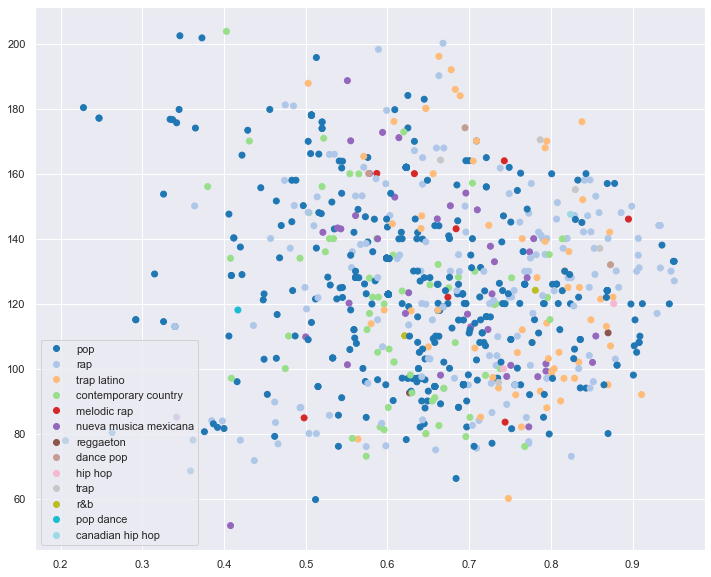

In [276]:
# plot
scatter = plt.scatter(
   x, y,
   c=new_genre_list[:999], cmap='tab20'
)
plt.legend(handles=scatter.legend_elements()[0], labels=new_genres)


plt.show()

In [183]:
my_dict = {i:genre_list.count(i) for i in genre_list}

In [184]:
my_dict

{0: 396,
 1: 160,
 11: 255,
 6: 64,
 7: 61,
 14: 8,
 16: 40,
 13: 2,
 2: 3,
 3: 2,
 4: 5,
 18: 2,
 9: 1,
 17: 1}

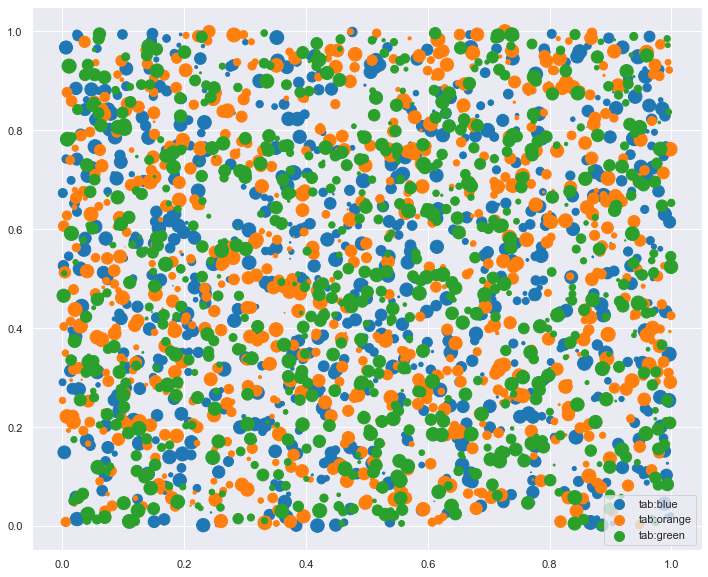

In [175]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 750
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color)

ax.legend()
ax.grid(True)

plt.show()

In [100]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

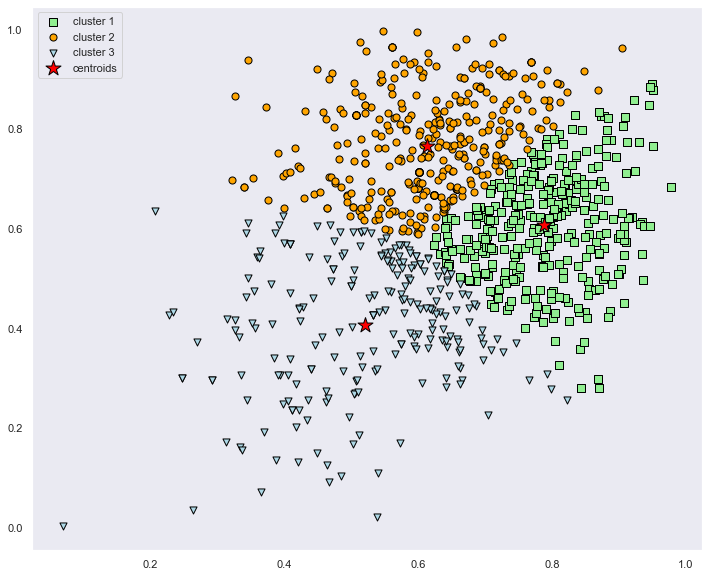

In [101]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [73]:
track_df

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Sam Smith,Unholy (feat. Kim Petras),3nqQXoyQOWXiESFLlDF1hG,100,2wY79sveU1sp5g7SokKOiI,87,"[dance pop, pop, uk pop]",20698155
1,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,97,06HL4z0CvFAxyc27GXpf02,100,[pop],61938852
2,Drake,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,92,3TVXtAsR1Inumwj472S9r4,97,"[canadian hip hop, canadian pop, hip hop, rap,...",68670658
3,d4vd,Romantic Homicide,1xK59OXxi2TAAAbmZK0kBL,93,5y8tKLUfMvliMe8IKamR32,77,[bedroom pop],268908
4,Drake,Major Distribution,46s57QULU02Voy0Kup6UEb,90,3TVXtAsR1Inumwj472S9r4,97,"[canadian hip hop, canadian pop, hip hop, rap,...",68670658
...,...,...,...,...,...,...,...,...
995,DBN Gogo,Love & Loyalty (Believe),1OiSTEB1SEaLGza2k4FIwo,63,3Oa0mJQWQrUOqJ8fcLuu7l,52,[amapiano],451780
996,Kid Cudi,Do What I Want,5OIz27S6SQOJtweneBd6QP,69,0fA0VVWsXO9YnASrzqfmYu,81,"[hip hop, ohio hip hop, rap]",6129413
997,g3ox_em,GigaChad Theme - Phonk House Version,7mLWNwcvwRdEviz6SfYp8A,78,0Zw2ivPEDptvMHwCXjhdRs,60,[gym hardstyle],4267
998,Calvin Harris,Potion (with Dua Lipa & Young Thug),7fYRg3CEbk6rNCuzNzMT06,77,7CajNmpbOovFoOoasH2HaY,83,"[dance pop, edm, electro house, house, pop, pr...",22951198


In [74]:
features1=['danceability','energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


#tf_df[features1].corr()
track_df.corr()
tf_df.corr()


,instrumentalness,duration_ms
instrumentalness,1.000000,-0.009468
duration_ms,-0.009468,1.000000


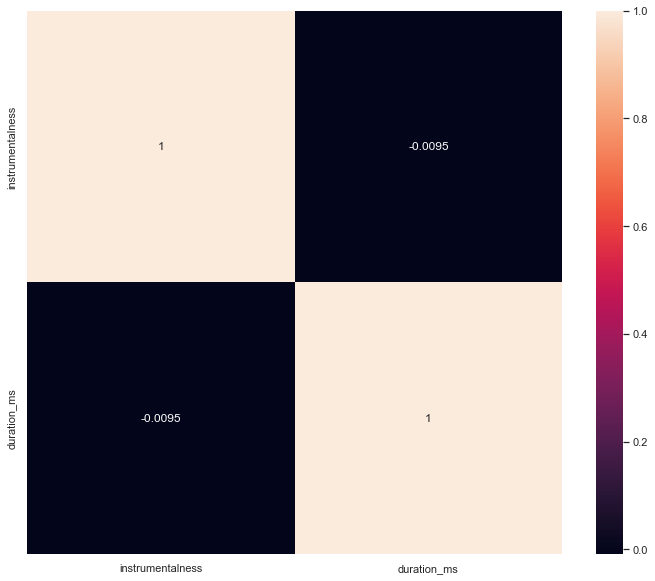

In [75]:
import seaborn as sn
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(tf_df.corr(), annot=True)
plt.show()

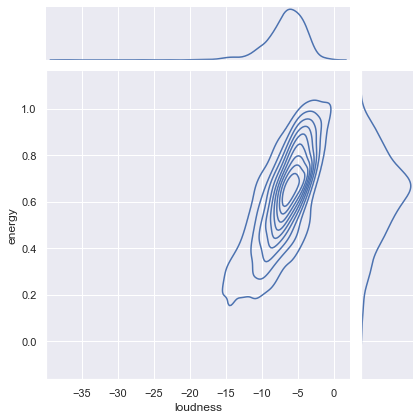

In [38]:
sn.set(rc = {'figure.figsize':(20,20)})
sn.jointplot(data=tf_df, x="loudness", y="energy", kind="kde")

In [39]:
feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
top_100_feat = pd.DataFrame(columns=feat_cols)
for i, track in by_track_pop[:100].iterrows():
  features = tf_df[tf_df['id'] == track['track_id']]
  top_100_feat = top_100_feat.append(features, ignore_index=True)
top_100_feat = top_100_feat[feat_cols]

from sklearn import preprocessing
mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(top_100_feat.mean(), ignore_index=True)
mean_vals = mean_vals.append(tf_df[feat_cols].mean(), ignore_index=True)
print(mean_vals)

import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='Top 100'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='All'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

#pyo.plot(fig)
fig.show()

/var/folders/1g/dn_fdr795vdgq1fc7vkqm3j00000gn/T/ipykernel_88288/3760115272.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/1g/dn_fdr795vdgq1fc7vkqm3j00000gn/T/ipykernel_88288/3760115272.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



  danceability    energy speechiness acousticness instrumentalness  liveness  \
0      0.69911   0.60611    0.109699      0.23442         0.011374  0.183639   
1     0.656827  0.624534    0.113225       0.2266         0.021266  0.179606   

    valence  
0   0.43781  
1  0.477903  


/var/folders/1g/dn_fdr795vdgq1fc7vkqm3j00000gn/T/ipykernel_88288/3760115272.py:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/1g/dn_fdr795vdgq1fc7vkqm3j00000gn/T/ipykernel_88288/3760115272.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [40]:
rec = sp.recommendations(seed_artists=["3PhoLpVuITZKcymswpck5b"], seed_genres=["pop"], seed_tracks=["1r9xUipOqoNwggBpENDsvJ"], limit=100)
for track in rec['tracks']:
  print(track['artists'][0]['name'], track['name'])

Eminem The Monster
DNCE Toothbrush
Elton John Sad Songs (Say So Much)
Van Morrison Have I Told You Lately
Twenty One Pilots My Blood
Snakehips All My Friends (feat. Tinashe & Chance the Rapper)
The Chainsmokers Everybody Hates Me
Camila Cabello OMG (feat. Quavo)
Trey Songz Nobody Else but You
Blue Sorry Seems To Be The Hardest Word - Radio Edit
Lionel Richie Stuck On You
Chris Rea Let's Dance
Sam Smith Pray
John Lennon Watching The Wheels - Remastered 2010
Bryson Tiller Don't
League of Legends Legends Never Die
Trey Songz Slow Motion
DJ Snake You Know You Like It
Charlie Puth I Don’t Think That I Like Her
Halsey Bad At Love
Drake God's Plan
Fleetwood Mac Go Your Own Way - 2004 Remaster
Imagine Dragons Burn Out
Miley Cyrus We Can't Stop
Julia Michaels Worst In Me
A$AP Mob RAF (feat. A$AP Rocky, Playboi Carti, Quavo, Lil Uzi Vert & Frank Ocean)
Wet Wet Wet With A Little Help From My Friends
Roger Taylor We're All Just Trying To Get By
Imagine Dragons Tokyo
Cheat Codes Only You (with Litt